# Task 2

In [1]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline
import os
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


In [2]:
#generate the distribution
dist_n = np.random.randn(1000)

#test ad and ks. those are easy
print "normal on normal", scipy.stats.kstest(dist_n,'norm')
print "normal on normal", scipy.stats.anderson(dist_n, dist='norm')
print "" 

dist_p = np.random.poisson(1, 1000)

print "poisson on normal", scipy.stats.kstest(dist_p,'norm')
print "poisson on normal", scipy.stats.anderson(dist_p, dist='norm')

threshold = scipy.stats.anderson(dist_n, dist='norm')[1][scipy.stats.anderson(dist_n, dist='norm')[2]==[1.0]]
print threshold

##what is this threshold I am saving??

normal on normal (0.027010329453455162, 0.45662642211859739)
normal on normal (1.3504975228134981, array([ 0.574,  0.653,  0.784,  0.914,  1.088]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

poisson on normal (0.5, 0.0)
poisson on normal (62.838279327774899, array([ 0.574,  0.653,  0.784,  0.914,  1.088]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
[ 1.088]


##For the KS test
For the first case: "normal on normal", I get a KS test statistic equal to $0.0219$. That means that the distance between both cummulative functions is $0.0219$ when they are further away from each other.
The P value for this test is $0.7224$, which is larger than our significance level. Then, we fail to reject the null hypothesis that the two samples were drawn from the same distribution.

On the second case "Poisson on normal" we get a KS statistic equal to $0.5$ (it is a big number!) and the P value is $0.0$ which is smaller than our confidence level. Then the Null hypothesis, that the two samples were drawn from the same distribution, is rejected.

##For the Anderson test
In the Anderson test, the outcomes are a number, which is the Anderson Statistic, and 2 arrays of 5 numbers each. The statistic value will be larger if the distributions are not likely to be related; the first array is a list of critical values, each one associated with a confidence level. According to the documentation, if the coefficient is larger than the critical value for the corresponding significance level, the null hypothesis that the data come from the chosen distribution is rejected.

For "normal on normal" we get a statistic equal to $0.5$ that is a smaller than our threshold $1.088$. Then, on the "normal on normal" case we fail to reject the Nule hypothesis with a $99 \%$ level of confidence. 

For "poisson on normal" case we get a statistic equal to $61.4347$ which is bigger than every critical value on the first array!. In particular, it is bigger than our threshold of $1.088$, then we reject the nule hypothesis with a $99 \%$ level of confidence. 

##The threshold
The threshold is choosing a critical value, for the given $\alpha =.01$. In this case, it is the last value of the first array (that is $1.088$)





## Entropy 

the KL divergence is a little trickier: i have to pass it the values of the distribution at some x's: that means i have to pass it a NORMALIZED HISTOGRAM OF MY DISTRIBUTION, i.e. derive a PDF from the data. we have done it before!
i have to pass it a function for my comparison distribution evaluated at the x-values where my empirical distribution is evaluated. not just the name of a distribution

In [3]:
distpdf_n, mybins_n, = np.histogram(dist_n, density=True)
distpdf_b, mybins_b, = np.histogram(dist_p, density=True)
#notice the extra comma on the left side of the '=' sign: that tells numpy take the first two values returned, and throw away the rest

then i have to pass it the functional form of a normal PDF, which is returned by the function scipy.stats.norm for example (a google search would have told you!) evaluated at the bin centers of the histogram from before

In [4]:
#get the bin centers
bincenters_n = mybins_n[:-1] + 0.5*(mybins_n[1] - mybins_n[0])
bincenters_b = mybins_b[:-1] + 0.5*(mybins_b[1] - mybins_b[0])
print "normal on normal", scipy.stats.entropy(distpdf_n, scipy.stats.norm.pdf(bincenters_n))  
print "poisson on normal", scipy.stats.entropy(distpdf_b, scipy.stats.norm.pdf(bincenters_b)) 

#you can interpret this as a distance: it increases as the distributions diverge

normal on normal 0.00728119351062
poisson on normal 0.499733390664


It looks like a high value is rejecting the NULL Hypothesis that the distribution from both sets come from the same theoretical distribution. 
Entropy, in this context, is a measure of how the information differs between two sets. The information difference is higher when both data sets come from a different distribution.

#Binomial

In [5]:
#to store the data i am generating an empty array of the size of the values of n i want to test. i do that with np.zeros which takes the length of the array as argument, and the data type as optional argument, but default is float, which is fine by me, so i do not need any argument other then the lenght 
narray = range(1,50,1)
ks_b = np.zeros(len(narray))
ad_b = np.zeros(len(narray))
kl_b = np.zeros(len(narray))
chi2_b = np.zeros(len(narray))


def mynorm (x, mu, var):
    return scipy.stats.norm.cdf(x, loc=mu, scale=var)

#then i put the tests in a for loop so that i can generate a distribution for given parameters once, 
#and run all tests against it
#now the valus that i want to plot depends on how i intend to describe the plot, and viceversa. 

#here is one way to plot it, knowing the values i get for the tests when 
#i throw in a poisson distribution with low l and compare it with a gaussian and 
#assuming that that is a vary bad match
p=0.5
for i,n in enumerate(narray):
    p=0.1 #parameter for the binomial, my arbitrary choice
    #generate the distribution
    dist = np.random.binomial(n, p, 1000)
    #run the tests. 
#####################I MADE A CHANGE HERE
    ks_b[i] = scipy.stats.kstest(dist, mynorm, args=(n*p, math.sqrt(n*p*(1.0-p))))[0]
    #ks_b[i] = scipy.stats.kstest(dist, mynorm, args=(n*p, n*p*(1.0-p)))[0]
    ad_b[i] = scipy.stats.anderson(dist, dist='norm')[0]
    
    
    # for KL and Pearson's chisq I have to simulate the normal distribution as well
    mybins=np.linspace(min(dist),max(dist), 10) 
    bincenters = mybins[:-1]+0.5*(mybins[1]-mybins[0])

    #when i was coding this up something was wrong. i put some plots in to figure out what... just so you know.
    #if i%10 == 0: 
    #    print n
    #    pl.figure()
    #    pl.hist(dist, bins=mybins)
    #    pl.plot(bincenters, 1000*scipy.stats.norm.pdf(bincenters, loc=n*p, scale=n*p*(1-p)))
    kl_b [i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0], scipy.stats.norm.pdf(bincenters, loc=n*p, scale=n*p*(1.0-p)))

Above, we are performing the KS, Anderson and KL tests for comparing a set of binomial distributions with n trials (n is a number that is increasing from 1 to 50) and with a probability of success equal to 0.1, with normal distributions of mean $n*p$ and variance $(n*p*(1.0-p))$. Now, we are going to plot the results of this trials.

##PLOT

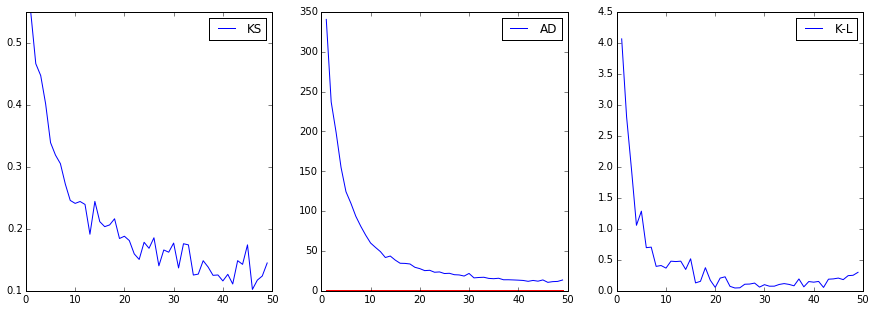

In [6]:
fig = pl.figure(figsize = (15,5))
fig.add_subplot(131)
pl.plot(narray, ks_b, label='KS')
pl.legend()

fig.add_subplot(132)
pl.plot(narray, ad_b,  label='AD')
pl.plot([narray[0], narray[-1]],[threshold, threshold],color='red')
pl.plot()
pl.plot()
pl.legend()

fig.add_subplot(133)
pl.plot(narray, kl_b, label='K-L ')

pl.legend()

####CAPTION 
(from left to right) Plot of the values of the KS, AD and KL tests, for goodness of the fit between a Binomial $B(n, 0.1)$ and a Normal $N(n*p, n*p*0.9)$  distributions  versus the number of trials $n$ (for $n= 1, 2, ..., 50$). As the number of trials $n$ grow, the value of the test tends to zero 

##Conclusion
What we have here is an extension of the Central Limit Theorem: "it states that the binomial distribution of the number of "successes" in n independent Bernoulli trials with probability p of success on each trial is approximately a normal distribution with mean $np$ and standard deviation $\sqrt{np(1-p)}$, if $n$ is very large and some conditions are satisfied" (https://en.wikipedia.org/wiki/De_Moivre%E2%80%93Laplace_theorem)

##Poisson

In [7]:
#to store the data i am generating an empty array of the size of the values of n i want to test. i do that with np.zeros which takes the length of the array as argument, and the data type as optional argument, but default is float, which is fine by me, so i do not need any argument other then the lenght 
narray = range(1,50,1)
ks_b = np.zeros(len(narray))
ad_b = np.zeros(len(narray))
kl_b = np.zeros(len(narray))
chi2_b = np.zeros(len(narray))


#then i put the tests in a for loop so that i can generate a distribution for given parameters once, 
#and run all tests against it
#now the valus that i want to plot depends on how i intend to describe the plot, and viceversa. 

#here is one way to plot it, knowing the values i get for the tests when 
#i throw in a poisson distribution with low l and compare it with a gaussian and 
#assuming that that is a vary bad match

for i,n in enumerate(narray):
    p=0.1 #parameter for the binomial, my arbitrary choice
    #generate the distribution
    dist = np.random.poisson(n, 1000)
    #run the tests. 
    ks_b[i] = scipy.stats.kstest(dist, mynorm, args=(n, math.sqrt(n)))[0]   ##You have to take sqrt(n) here.
    ad_b[i] = scipy.stats.anderson(dist, dist='norm')[0]
    
        
    # for KL and Pearson's chisq I have to simulate the normal distribution as well
    mybins = np.linspace(min(dist),max(dist), 10) 
    bincenters = mybins[:-1]+0.5*(mybins[1]-mybins[0])
 
    kl_b [i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0], scipy.stats.norm.pdf(bincenters, loc=n*p, scale=n*p*(1.0-p)))

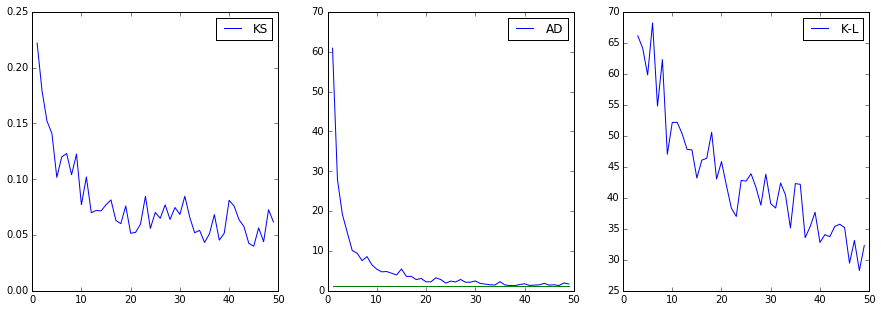

In [8]:
fig = pl.figure(figsize = (15,5))
fig.add_subplot(131)
pl.plot(narray, ks_b, label='KS')
pl.legend()

fig.add_subplot(132)
pl.plot(narray, ad_b,  label='AD')
pl.plot([narray[0], narray[-1]],[threshold, threshold])
pl.plot()
pl.plot()
pl.legend()

fig.add_subplot(133)
pl.plot(narray, kl_b, label='K-L ')

pl.legend()

###Caption

(From left to right) Plot of the values of the KS, AD and KL tests, for goodness of the fit between a Poisson $P(n)$ and a Normal $N(n, \sqrt{n})$  distributions  versus the number of trials (for $1, 2, ..., 50$). As the number of trials grow, the value of the test tends to zero